# Import Statements

In [46]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Train and Validation Split

In [47]:
#Pass the percentage of data you need for test like 20 % 
def train_split(df,test_per):
    indices=df.index.tolist()
    test_size=round(len(df)*(test_per/100))
    random.seed(0)
    test_indices=random.sample(population=indices,k=test_size)
    valid_df=df.loc[test_indices]
    train_df=df.drop(test_indices)
    return train_df,valid_df

# Cost function

In [48]:
def cost_function(X, Y, W ,lamda):
    #Cost function J=(1/2m)*[(sum(pow(hypothesis(xi) - (yi)),2)) + (lamda*sum(abs(wi))) ]#hypothesis=X.T*W as X=data.T
    m = len(Y)
    reg_penalty=(lamda)*np.sum(np.absolute(W))
    J=0
    for i in range(0,m):
        x=X[i]
        y=Y[i]
        hypothesis=x.dot(W)
        J+=(pow(hypothesis-y,2))
    J+=reg_penalty
    J/=(2*m)
    return J

# Gradient descent

In [49]:
def gradient_descent(X,Y,B,lamda,alpha,prev_cost,iters=0):
    #formula: Bj = Bj - alpha*(1/m)*((hypothesis(x)-y)*xj) - lamda/m*Bj
    if( iters > 1500 ):
        return B,prev_cost
    m=len(Y)
    for j in range(0,len(B)):
        sum=0
        gradient=1
        for i in range(0,m):
            x=X[i]
            y=Y[i]
            hypothesis=x.dot(B)
            sum+=(hypothesis-y)*x[j]
        if( B[j] >= 0):
            sign=1
        else:
            sign=-1
        reg_penalty=lamda/m*sign
        gradient=sum/m
        #update Bj
        if( j == 0):
            B[j]-=(alpha*gradient)
        else:
            B[j]-=(alpha*gradient) + reg_penalty
    cost=cost_function(X,Y,B,lamda)
    #print(prev_cost,cost)
    if(abs(prev_cost - cost) < 0.000001):
        return B,cost
    else:
        B,cost=gradient_descent(X,Y,B,lamda,alpha,cost,iters+1)
    return B,cost

# Prediction

In [50]:
def predict(x,B):
    ans=x.dot(B)
    return ans

In [51]:
def cal_error(X,Y,B,title):
    actual_list=[]
    predicted_list=[]
    m=len(Y)
    MSE=0
    MAE=0
    MPE=0
    for i in range(0,len(X)):
        actual=Y[i]
        predicted=predict(X[i],B)
        actual_list.append(actual)
        predicted_list.append(predicted)
        MSE+=pow((actual-predicted),2)
        MAE+=abs(actual-predicted)
        MPE+=MAE/actual*1    
    MSE/=m
    MAE/=m
    MPE/=m
    plot_linearreg(actual_list,predicted_list,title)
    return MSE,MAE,MPE,actual_list,predicted_list

In [52]:
def cal_MSE(X,Y,B):
    m=len(Y)
    MSE=0
    for i in range(0,len(X)):
        actual=Y[i]
        predicted=predict(X[i],B)
        MSE+=pow((actual-predicted),2)    
    MSE/=m
    return MSE

In [53]:
def plot_linearreg(actual_list,predicted_list,title):
    x_labels=[]
    for i in range(len(actual_list)):      #oddnumbers
        x_labels.append(i)
        
    area=np.pi
    plt.xlabel("Students")
    plt.ylabel("Chance of Admit")
    plt.title(title)

    plt.scatter(x_labels, predicted_list, s=area, c='blue', alpha=0.5)
    plt.scatter(x_labels, actual_list, s=area, c='red', alpha=0.5)

    plt.show()
    return

# Linear Regression Function

In [54]:
def linear_reg_error(train_X,train_Y,B,lamda,alpha,valid_X,valid_Y):
    
    init_J=cost_function(train_X,train_Y,B,lamda)
    
    B,final_J=gradient_descent(train_X,train_Y,B,lamda,alpha,init_J)
    print("Final_cost- ",final_J)
    print(B)
    
    MSE=cal_MSE(valid_X,valid_Y,B)
    return MSE

In [55]:
#Plot graph between lamda and error
def plot_lamda_error(train_X,train_Y,alpha,valid_X,valid_Y):
    no_coefficients=8
    lamda_list=[]
    error_list=[]
    #list=[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 3, 5, 10, 20]
    list=[0.000001,0.0001,0.01,0.1,1,2,3,5,10,15,20,50,100,200]
    for lamda in list:
        print("Lamda value ",lamda)
        lamda_list.append(lamda)
        B = np.zeros(no_coefficients)
        error=linear_reg_error(train_X,train_Y,B,lamda,alpha,valid_X,valid_Y)
        print("MSE Error ",error)
        print()
        error_list.append(error)
    #print(lamda_list)
    #print(error_list)
    #Plot Graph
    area=np.pi
    plt.xlabel("Lamda")
    plt.ylabel("Error")

    plt.plot(lamda_list, error_list)
    plt.show()
    
    return

# Helper functions

In [56]:
#Creating X(data.T),Y arrays from df
def to_arrays(df,label):
    no_rows,no_cols=df.shape
    header=list(df.columns)
    data_array=np.ones((no_cols-1,no_rows))
    X0=np.ones(no_rows)                      #X0=1
    for i in range(0,no_cols-1):             #Removing first col-serial no , last col-label
        if(i == 0):
            data_array[i]=X0
        else:
            x=df[header[i]].values
            #data_array[i]=x
            data_array[i]=mean_normalize(x)
    X=data_array.T        #Doing Transpose

    #Y (output) array
    Y=np.array(df[label].values)
    
    return X,Y

In [57]:
def mean_normalize(x):
    x_new=np.ones(len(x))
    mean=np.mean(x)
    std=np.std(x)
    for i in range(0,len(x)):
        x_new[i]=(x[i]-mean)/(std)
    return x_new

In [58]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# def scikit_linearregression(train_X,train_Y,valid_X,valid_Y):

#     # Model Intialization
#     reg = LinearRegression()
#     # Data Fitting
#     reg = reg.fit(train_X,train_Y)
#     # Y Prediction
#     Y_pred = reg.predict(valid_X)
#     #print(Y_pred)

#     # Model Evaluation
#     mse = mean_squared_error(valid_Y, Y_pred)
#     print("Mean Square Error -",mse)
#     mae = mean_absolute_error(valid_Y, Y_pred)
#     print("Mean Absolute Error -",mae)


# Main

In [59]:
def main():
    file="AdmissionDataset/data.csv"
    label='Chance of Admit '
    no_coefficients=8  #[B0,B1,B2,...,B7] also 7 columns but X0=1
    
    df=pd.read_csv(file)
    header=list(df.columns)
   
    train_df,valid_df=train_split(df,20)
    
    #train_df=train_df[:,:20]
    
    #Training
    train_X,train_Y=to_arrays(train_df,label)
    
    #B(beta) array of coefficients
    #Initialized to zero
    B = np.zeros(no_coefficients)

    alpha = 0.003
    lamda = 0.01
        
    init_J=cost_function(train_X,train_Y,B,lamda)
    print("Initial_cost- ",init_J)
    
    B,final_J=gradient_descent(train_X,train_Y,B,lamda,alpha,init_J)
    print("Final_cost- ",final_J)
    print(B)
    
    #Linear Regression Plot
    print("------Training--------")
    MSE,MAE,MPE,actual_list,predicted_list=cal_error(train_X,train_Y,B,"Linear Regression-Training")
    print("Mean Square Error-",MSE)
    print("Mean Absolute Error-",MAE)
    print("Mean Absolute Percentage Error-",MPE)
    
    
    #Prediction
    valid_X,valid_Y=to_arrays(valid_df,label)
    print("\n\n-------Prediction------")
    MSE,MAE,MPE,_,_=cal_error(valid_X,valid_Y,B,"Linear Regression-Validation")
    print("Mean Square Error-",MSE)
    print("Mean Absolute Error-",MAE)
    print("Mean Absolute Percentage Error-",MPE)
    
    #Plot between lamda and error
    print("\nGraph between lamda and error")
    plot_lamda_error(train_X,train_Y,alpha,valid_X,valid_Y)
    
    return

Initial_cost-  0.26883291666666687
Final_cost-  0.0021232870020258376
[0.70181944 0.02716427 0.02022533 0.00976201 0.00717049 0.01233171
 0.04594153 0.01110807]
------Training--------


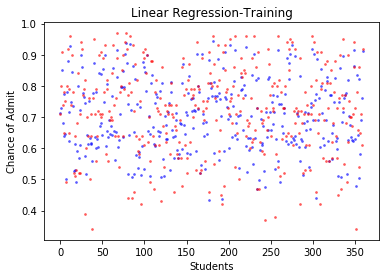

Mean Square Error- 0.004223365035911271
Mean Absolute Error- 0.05118071413629078
Mean Absolute Percentage Error- 13.456678191096547


-------Prediction------


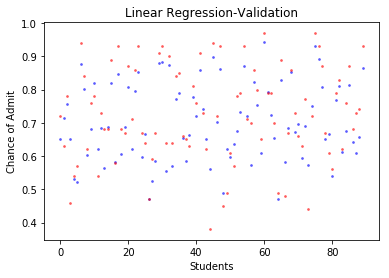

Mean Square Error- 0.004279822939048903
Mean Absolute Error- 0.05396608490223248
Mean Absolute Percentage Error- 3.609775254947816

Graph between lamda and error
Lamda value  1e-06
Final_cost-  0.0020515687805301827
[0.70187257 0.02822508 0.02211317 0.01169629 0.0088618  0.01568017
 0.04604213 0.01581968]
MSE Error  0.004250607213271586

Lamda value  0.0001
Final_cost-  0.002051611136662823
[0.70187257 0.02821458 0.02209444 0.01167711 0.00884501 0.015647
 0.04604126 0.01577302]
MSE Error  0.004249506681957608

Lamda value  0.01
Final_cost-  0.0021232870020258376
[0.70181944 0.02716427 0.02022533 0.00976201 0.00717049 0.01233171
 0.04594153 0.01110807]
MSE Error  0.004279822939048903

Lamda value  0.1
Final_cost-  0.009991551529860004
[6.42571271e-01 5.11208016e-03 5.06328799e-04 1.56929491e-04
 2.33698993e-04 9.65167904e-05 2.18096184e-02 3.15566626e-04]
MSE Error  0.02072056884303331

Lamda value  1
Final_cost-  0.011419622114495173
[ 6.80968245e-01  1.76860244e-03  1.28554598e-03 -2.

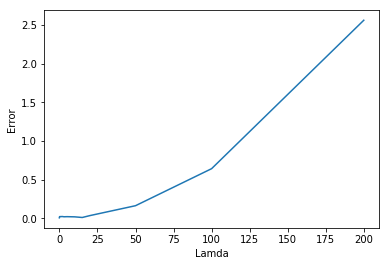

In [60]:
if __name__ == "__main__":
    main()